# Step1 匯入資料

In [11]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

784
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


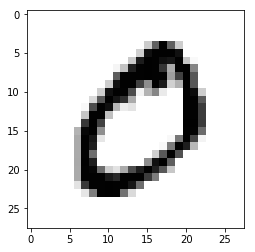

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = mnist['data'][0]
print(len(some_digit))

print(type(some_digit))
some_digit_image = some_digit.reshape(28, 28)
print(type(some_digit_image))

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
#plt.axis("off")

plt.show()

In [13]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


# Step2 選取70%資料做預測

In [14]:
import numpy as np
shuffle_index = np.random.permutation(70000) #洗牌
#70000*0.7 = 49000
X_train, X_test, y_train, y_test = X[shuffle_index[:49000]], X[shuffle_index[49000:]], y[shuffle_index[:49000]], y[shuffle_index[49000:]] 

In [15]:
#test
import numpy as np 
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = np.array([ 2, 0])
print(a[b])

[[ 9 10 11 12]
 [ 1  2  3  4]]


# Step3 平均分配資料

In [16]:
from collections import Counter
count_data= Counter(y_train)
print(count_data)

Counter({1.0: 5535, 7.0: 5120, 3.0: 4971, 2.0: 4900, 9.0: 4863, 0.0: 4861, 4.0: 4782, 6.0: 4780, 8.0: 4732, 5.0: 4456})


# Step4 naive_bayes

In [17]:
from sklearn.naive_bayes import BernoulliNB
import datetime

starttime = datetime.datetime.now()

BernoulliNB_clf = BernoulliNB()
BernoulliNB_clf.fit(X_train, y_train)

BeriNB_mnist_pre = BernoulliNB_clf.predict(X_train)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_train, BeriNB_mnist_pre)
print(accuracy)
endtime = datetime.datetime.now()
print ('time: ',(endtime-starttime))

0.8353469387755103
time:  0:00:01.282843


# Step5 混淆矩陣

In [18]:
import pandas as pd
pd.crosstab(y_train, BeriNB_mnist_pre,rownames=['label'],colnames=['predict'])

predict,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
label,,,,,,,,,,
0.0,4351,2,23,33,13,218,82,0,134,5
1.0,0,5321,53,11,4,51,20,4,61,10
2.0,88,68,4058,117,91,17,193,45,209,14
3.0,40,108,216,3987,12,117,36,61,246,148
4.0,12,39,23,0,3851,26,75,18,111,627
5.0,138,63,36,638,138,3130,99,21,77,116
6.0,46,127,83,3,38,159,4286,0,36,2
7.0,21,108,45,13,121,6,2,4356,96,352
8.0,62,172,83,375,47,127,31,15,3631,189


# Step6 交叉驗證

In [20]:
from sklearn.model_selection import cross_val_score
import datetime
starttime = datetime.datetime.now()

score = cross_val_score(BernoulliNB_clf, X_train, y_train, cv=5, scoring="accuracy")
print(score)
endtime = datetime.datetime.now()
print ('time: ',(endtime-starttime))

[0.8374133  0.83420059 0.83222778 0.83496632 0.83363952]
time:  0:00:02.643712
